# Week 5

**Digit Classification Using CNN**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.layers import BatchNormalization, Flatten, Dropout, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the MNIST dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Print shape of the training set
print(X_train.shape, '\n')
# Print the matrix of the first image in the set
print(X_train[0])

(60000, 28, 28) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

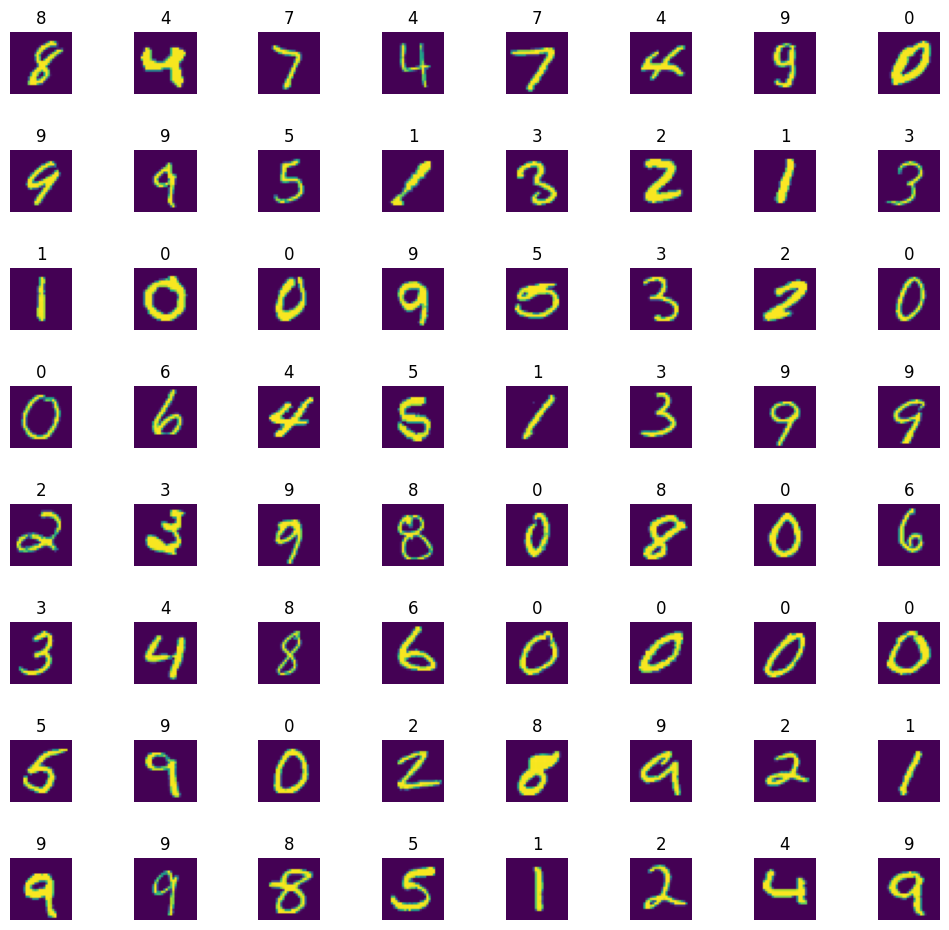

In [ ]:
from sklearn.utils import shuffle

# Define function for displaying a random set of 64 images from set
def showImages(num_row, num_col, X, Y):
    import matplotlib.pyplot as plt

    (X_rand, Y_rand) = shuffle(X, Y)
    fig, axes = plt.subplots(num_row, num_col, figsize = (12, 12))
    axes = axes.ravel()

    for i in range(0, num_row * num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(Y_rand.item(i)))
        axes[i].axis('off')
        plt.subplots_adjust(wspace = 1)

    return

num_row = 8
num_col = 8

showImages(num_row, num_col, X = X_train, Y = y_train)

In [ ]:
# Preprocessing the dataset
# Set 'pixel' value between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

# State greyscale (1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()

# Add layers
model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28, 28, 1), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size = 4, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_split = 0.2, epochs = 5, batch_size = 64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8479 - loss: 0.4986 - val_accuracy: 0.9841 - val_loss: 0.0538
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9800 - loss: 0.0679 - val_accuracy: 0.9894 - val_loss: 0.0362
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9852 - loss: 0.0484 - val_accuracy: 0.9893 - val_loss: 0.0389
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9881 - val_loss: 0.0404
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9889 - loss: 0.0343 - val_accuracy: 0.9909 - val_loss: 0.0295


In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9901 - loss: 0.0298
Test accuracy: 0.9926000237464905


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step


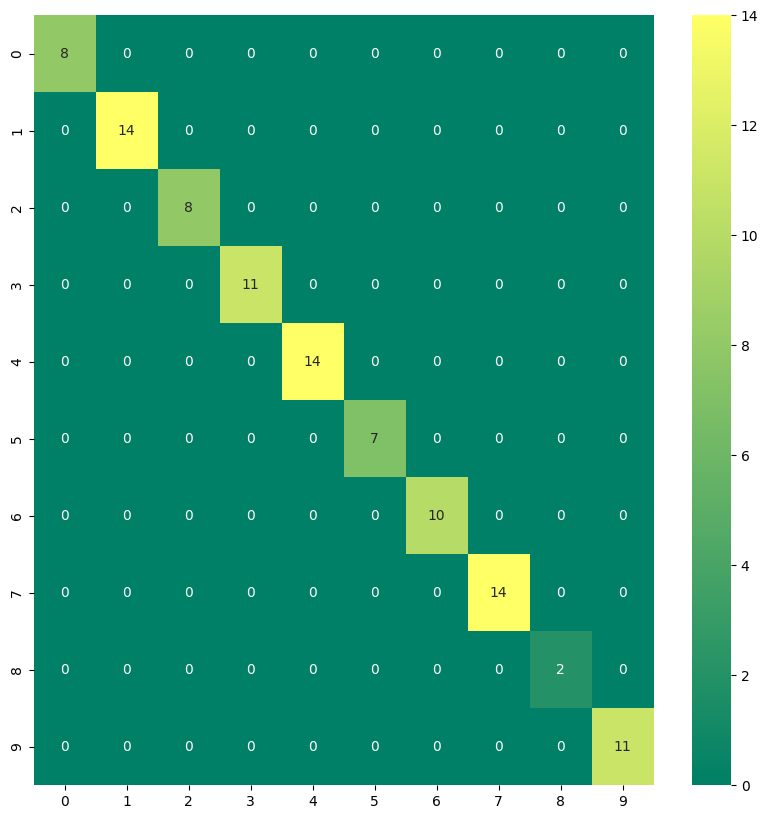

In [ ]:
predictions = model.predict(X_test[1:100])
predictions = np.argmax(predictions, axis = 1)
plt.figure(figsize = (10, 10))
cm = confusion_matrix(y_test[1:100], predictions)
ax = plt.subplot()
sns.heatmap(cm, annot = True, cmap = 'summer', fmt = 'g', ax = ax);

In [ ]:
print(X_test[1:5].shape)

(4, 28, 28, 1)


In [ ]:
print(predictions.shape)
print(y_test.shape)

(99,)
(10000,)


**GradCAM With CNN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [ ]:
# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
# Build CNN model
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name='last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

In [ ]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9035 - loss: 0.3072 - val_accuracy: 0.9842 - val_loss: 0.0538
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0441 - val_accuracy: 0.9902 - val_loss: 0.0323
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9910 - loss: 0.0279 - val_accuracy: 0.9892 - val_loss: 0.0367
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9930 - loss: 0.0235 - val_accuracy: 0.9912 - val_loss: 0.0295
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9934 - loss: 0.0189 - val_accuracy: 0.9908 - val_loss: 0.0361


In [ ]:
# Grad-CAM function
def compute_gradcam(model, image, label_index, layer_name='last_conv'):
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, label_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

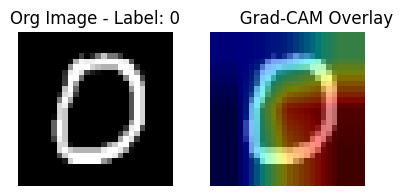

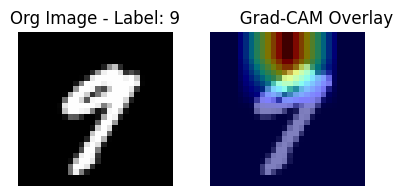

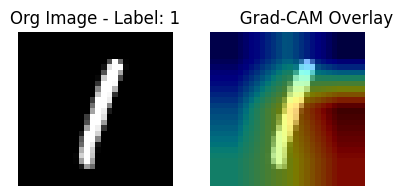

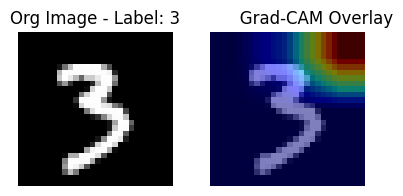

In [ ]:
# Visualize Grad-CAM
image_index = [10,20,5,30]
for i in image_index:
  image = X_test[i]
  label = y_test[i]
  heatmap = compute_gradcam(model, image, label)
# Resize heatmap to match input image
  heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [28, 28]).numpy().squeeze()
  plt.figure(figsize=(4, 2))
  plt.subplot(1, 2, 1)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(f"Org Image - Label: {label}")
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
  plt.title("           Grad-CAM Overlay")
  plt.axis('off')
  plt.tight_layout()
  plt.show()

**Compare The Accuracies Of Two Models (With Pooling Vs Without)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten, Dropout
from sklearn.utils import shuffle

In [219]:
# Load dataset into training and testing sets
(feat_train, tar_train), (feat_test, tar_test) = cifar10.load_data()

In [220]:
# Check shapes of each set for understanding
print(f'Feature training shape: {feat_train.shape}')
print(f'Target training shape: {tar_train.shape}')
print(f'Feature testing shape: {feat_test.shape}')
print(f'Target testing shape: {tar_test.shape}')

Feature training shape: (50000, 32, 32, 3)
Target training shape: (50000, 1)
Feature testing shape: (10000, 32, 32, 3)
Target testing shape: (10000, 1)


In [221]:
# Define list for category names
category_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck']

# Define new function for displaying images with class names
def display_images(row_num, col_num, feat, tar):
  # Shuffle dataset to prevent displaying same n images
  (rand_feat, rand_tar) = shuffle(feat, tar)
  # Create subplot
  fig, axes = plt.subplots(row_num, col_num, figsize = (10, 10))
  # Reduce to 1D for easy reference
  axes = axes.ravel()

  # Config each image
  for i in range(0, row_num * col_num):
    axes[i].imshow(rand_feat[i])
    axes[i].set_title(category_names[rand_tar[i, 0]])
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 1)

  # End of function
  return

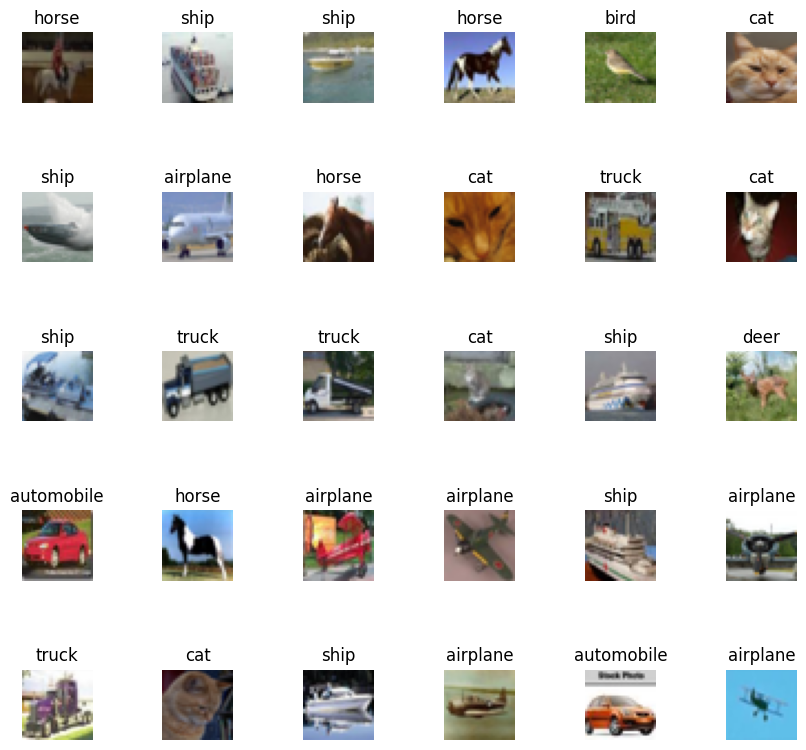

In [222]:
# Display 30 images from training set
display_images(5, 6, feat_train, tar_train)

In [223]:
# Print maximum value for each pixel
print(f'Feature training maximum value: {feat_train.max()}')
print(f'Feature testing maximum value: {feat_train.max()}\n')

# Normalise the data
feat_train = feat_train.astype('float32') / 255.0
feat_test = feat_test.astype('float32') / 255.0

# Remove these lines as CIFAR-10 images are already 3-channel
# feat_train = np.expand_dims(feat_train, -1)
# feat_test = np.expand_dims(feat_test, -1)

# Print maximum value for each pixel
print(f'Feature training maximum value: {feat_train.max()}')
print(f'Feature testing maximum value {feat_train.max()}')

Feature training maximum value: 255
Feature testing maximum value: 255

Feature training maximum value: 1.0
Feature testing maximum value 1.0


In [224]:
# Build the no pooling CNN model
inputs = layers.Input(shape = (32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
x = layers.Conv2D(64, (3, 3), activation = 'relu')(x)
x = layers.Conv2D(128, (3, 3), activation = 'relu', name = 'last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(10, activation = 'softmax')(x)
no_pool_model = Model(inputs, outputs)

no_pool_model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

no_pool_model.fit(feat_train, tar_train, epochs = 4, validation_split = 0.2, batch_size = 64)

Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3951 - loss: 1.6642 - val_accuracy: 0.5921 - val_loss: 1.1474
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6454 - loss: 1.0096 - val_accuracy: 0.6582 - val_loss: 0.9749
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7389 - loss: 0.7533 - val_accuracy: 0.6746 - val_loss: 0.9469
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8149 - loss: 0.5377 - val_accuracy: 0.6623 - val_loss: 1.0442


In [ ]:
no_pool_test_loss, no_pool_test_acc = no_pool_model.evaluate(feat_test, tar_test)
print(f'No pooling model test loss: {no_pool_test_loss:.2f}')
print(f'No pooling model test acc: {no_pool_test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6654 - loss: 1.4576
No pooling model test loss: 1.49
No pooling model test acc: 0.66


In [ ]:
# Build the pooling CNN model
inputs = layers.Input(shape = (32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation = 'relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation = 'relu', name = 'last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(10, activation = 'softmax')(x)
pool_model = Model(inputs, outputs)

pool_model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

pool_model.fit(feat_train, tar_train, epochs = 4, validation_split = 0.2, batch_size = 64)

Epoch 1/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3324 - loss: 1.7931 - val_accuracy: 0.5049 - val_loss: 1.3604
Epoch 2/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5530 - loss: 1.2615 - val_accuracy: 0.6123 - val_loss: 1.0950
Epoch 3/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6273 - loss: 1.0543 - val_accuracy: 0.6384 - val_loss: 1.0284
Epoch 4/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6652 - loss: 0.9450 - val_accuracy: 0.6515 - val_loss: 1.0065
Epoch 5/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6998 - loss: 0.8477 - val_accuracy: 0.6870 - val_loss: 0.8904
Epoch 6/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7360 - loss: 0.7570 - val_accuracy: 0.6984 - val_loss: 0.8887


In [ ]:
pool_test_loss, pool_test_acc = pool_model.evaluate(feat_test, tar_test)
print(f'Pooling model test loss: {pool_test_loss:.2f}')
print(f'Pooling model test acc: {pool_test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6978 - loss: 0.8889
Pooling model test loss: 0.90
Pooling model test acc: 0.69


In [ ]:
# Show output shape transition through layers.
no_pool_model.summary()

Model: "functional_329"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,895,264 (64.45 MB)

 Trainable params: 5,631,754 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,263,510 (42.97 MB)

In [ ]:
# Show output shape transition through layers, note pooling difference.
pool_model.summary()

Model: "functional_330"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [ ]:
# Compare the evaulation metrics for each CNN model using classification reports
from sklearn.metrics import classification_report

y_pred_no_pool = no_pool_model.predict(feat_test)
y_pred_pool = pool_model.predict(feat_test)

y_pred_no_pool = np.argmax(y_pred_no_pool, axis = 1)
y_pred_pool = np.argmax(y_pred_pool, axis = 1)

no_pool_cr = classification_report(tar_test.flatten(), y_pred_no_pool, target_names = category_names)
pool_cr = classification_report(tar_test.flatten(), y_pred_pool, target_names = category_names)

print('No Pooling Classification Report: \n', no_pool_cr, '\n')
print('Pooling Classification Report: \n', pool_cr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
No Pooling Classification Report: 
               precision    recall  f1-score   support

    airplane       0.72      0.71      0.72      1000
  automobile       0.82      0.75      0.78      1000
        bird       0.52      0.55      0.54      1000
         cat       0.47      0.44      0.45      1000
        deer       0.62      0.55      0.59      1000
         dog       0.60      0.51      0.55      1000
        frog       0.67      0.80      0.73      1000
       horse       0.70      0.72      0.71      1000
        ship       0.76      0.81      0.78      1000
       truck       0.73      0.78      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000
 

Pooling Classification Report: 
               precision    recall  f1-score   support

    airplane       0.82      0.62

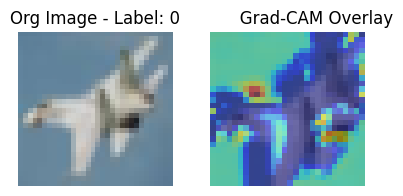

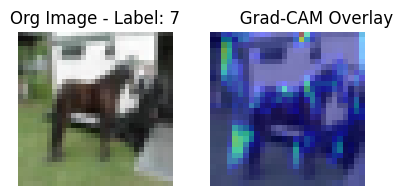

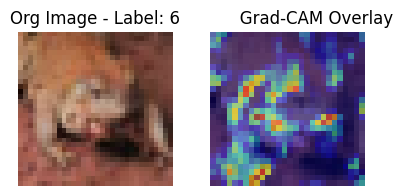

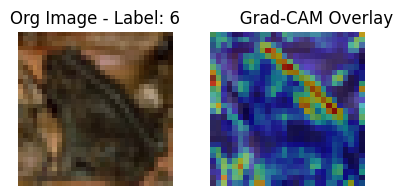

In [ ]:
# Visualize Grad-CAM for no pooling model
image_index = [10,20,5,30]
for i in image_index:
  image = feat_test[i]
  label = tar_test[i].item()
  heatmap = compute_gradcam(no_pool_model, image, label)
# Resize heatmap to match input image
  heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [28, 28]).numpy().squeeze()
  plt.figure(figsize=(4, 2))
  plt.subplot(1, 2, 1)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(f"Org Image - Label: {label}")
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
  plt.title("           Grad-CAM Overlay")
  plt.axis('off')
  plt.tight_layout()
  plt.show()

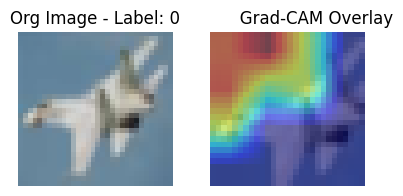

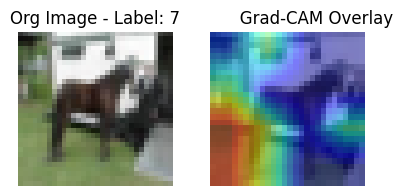

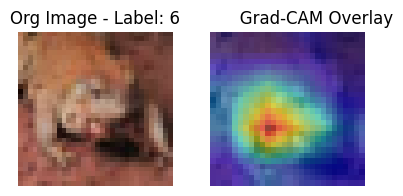

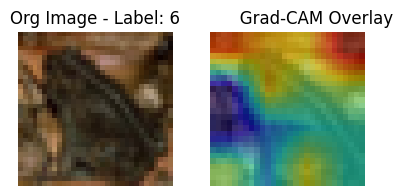

In [ ]:
# Visualize Grad-CAM for pooling model
image_index = [10,20,5,30]
for i in image_index:
  image = feat_test[i]
  label = tar_test[i].item()
  heatmap = compute_gradcam(pool_model, image, label)
# Resize heatmap to match input image
  heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [28, 28]).numpy().squeeze()
  plt.figure(figsize=(4, 2))
  plt.subplot(1, 2, 1)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(f"Org Image - Label: {label}")
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
  plt.title("           Grad-CAM Overlay")
  plt.axis('off')
  plt.tight_layout()
  plt.show()

**Reflection**

For this week, I developed CNN models to classify images. I used two different datasets, the first being digit based and the second being random animals and objects. The accuracy of the first model was very high, this was to be expected as it was working with the more easily identifiable dataset (digits do not tend to vary as much relative to the other dataset).

I compared two differnt CNN models, one with out pooling layers and the other with. The biggest noticeable difference between the two was computational speed, with the pooling model performing much faster. The summary of each model further reinforces this as the data that is passed to each layer if progressively smaller. I also implemented XAI for both CNN models using GradCam. A heatmap of the last convolution layer is mapped across the original image. The various colours show the degree of consideration when each model made its classification.

The pooling model performed, slightly, on average better than the non-pooling model. This suggests that the dimension reduction had indeed had little to no impact on the effective output. I also believe that both models overfitted, the pooling one much less so. The results of both their training evaluations are much higher than their testing evaluations. Overall, pooling appears to be a very effective method of increasing efficency whilst minimally impacting output effectiveness.